Number of iterations:  367


Text(0, 0.5, 'Predicted_y')

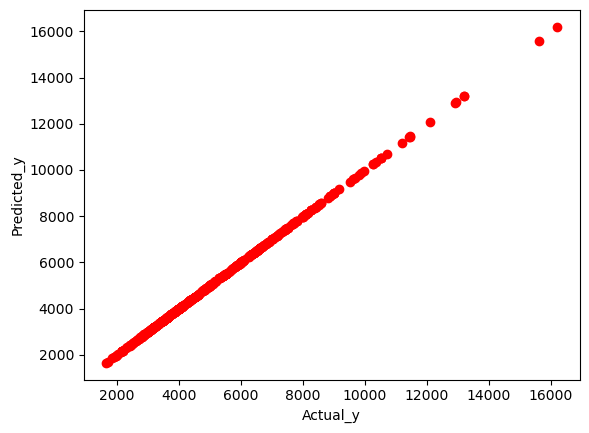

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("Housing.csv")                  #Creating a DataFrame of Houseing.csv data

df1 = df.drop(df.iloc[:, 4:], axis = 1)          #Droping the categorical values 

y = np.array(df.iloc[:,1]).reshape(-1,1)         #Target variable
X = df.drop(['price'], axis = 1)                 #Fetures

from sklearn.preprocessing import StandardScaler #Scaling the features
scaler = StandardScaler()
X1 = scaler.fit_transform(df.iloc[:,0:3])

x_new1  = np.concatenate((np.ones(np.size(X1, 0)).reshape(-1, 1), X1),axis=1)  #Concatenate with column with all one's

m = np.size(x_new1,0)                           #Number of examples
n = np.size(x_new1, 1)                          #Number of features
b0 = np.ones((n, 1))                            #Initialize coefficient values by 'ones'
b1 = 10*np.ones((n, 1)) 

eta = 0.1                                       #Initialize eta=0.1
c = 0

for i in range(1000):
    h_x = np.dot(x_new1, b0)                     #Gradient Decent Formula
    error = y - h_x
    grad = np.dot(x_new1.T, error)
    b1 = b0 + (1/(m))*eta* grad
    if(np.linalg.norm(b1 - b0) < 10**(-5) ):    #Taking Stoping criteria by norm
        break
    b0 = b1
    c += 1
    

import matplotlib.pyplot as plt 

y_pred = np.dot(x_new1, b0)
print("Number of iterations: ", c)


plt.scatter(y, y_pred, color = 'red')
plt.xlabel('Actual_y')
plt.ylabel('Predicted_y')